In [1]:
from google.colab import drive
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

drive.mount('/content/drive') #Connecting our colab with our Drive

file_path = "/content/drive/Shareddrives/IS24/Data.csv"

data = []
data = pd.read_csv("/content/drive/Shareddrives/IS24/Data.csv") # Reading Initial Data

Mounted at /content/drive


In [2]:
selected_features_rfe = [
    "FACIND_1",
    "FACSEC_1",
    "BACARN_51",
    "BACARN_54",
    "VETSTAT_2",
    "BACARN_56",
    "FACBEN_4",
    "FACSEC_L",
    "FACIND_L",
    "FACADV_L",
    "FACCHAL_L",
    "FACLOC_L",
    "FACRESP_L",
    "FACSAL_L",
    "FACBEN_L",
    "FACSAL_4",
    "MARIND"
]

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and 'LFSTAT' is the target variable
X = data.drop('LFSTAT', axis=1)
y = data['LFSTAT']

# It's often a good practice to scale the data for regularization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a logistic regression model with L1 regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  # C is the inverse of regularization strength

# Create a logistic regression model with L2 regularization
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)  # Default is L2, but specifying for clarity

# Fit the models
model_l1_result = model_l1.fit(X_train, y_train)
model_l2_result = model_l2.fit(X_train, y_train)

# Assess the models
print("L1 Regularized Model Score: ", model_l1.score(X_test, y_test))
print("L2 Regularized Model Score: ", model_l2.score(X_test, y_test))

L1 Regularized Model Score:  0.9603196026561572
L2 Regularized Model Score:  0.9603196026561572


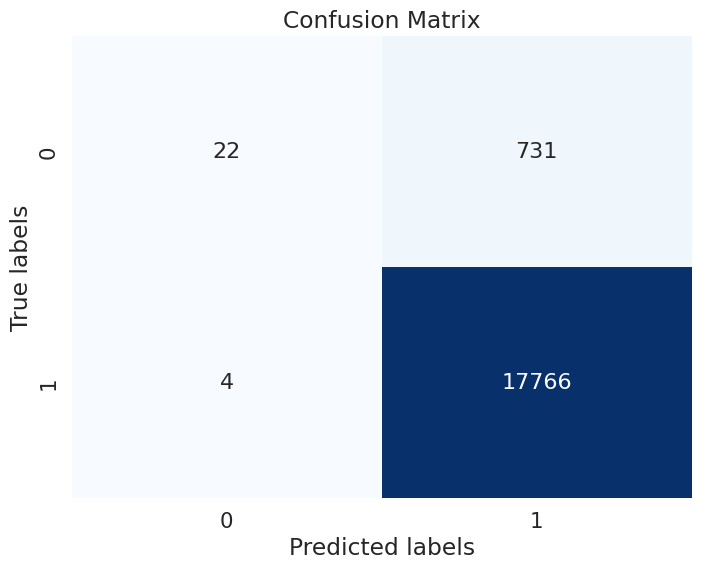

Confusion Matrix:
 [[   22   731]
 [    4 17766]]
Sensitivity (Recall or True Positive Rate): 1.00
Specificity (True Negative Rate): 0.03

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.03      0.06       753
        True       0.96      1.00      0.98     17770

    accuracy                           0.96     18523
   macro avg       0.90      0.51      0.52     18523
weighted avg       0.96      0.96      0.94     18523



In [4]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assume X_test and y_test are your features and labels for the test set
# And 'model' is your trained logistic regression model
y_predl1 = model_l1.predict(X_test)
y_predl2 = model_l2.predict(X_test)


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_predl1)
tn, fp, fn, tp = cm.ravel()

# Calculate Sensitivity and Specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

cm = confusion_matrix(y_test, y_predl1)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)  # fmt='g' to avoid scientific notation

# Adding labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:\n", cm)
print("Sensitivity (Recall or True Positive Rate): {:.2f}".format(sensitivity))
print("Specificity (True Negative Rate): {:.2f}".format(specificity))

# Additionally, print a full classification report
print("\nClassification Report:\n", classification_report(y_test, y_predl1))

For L2

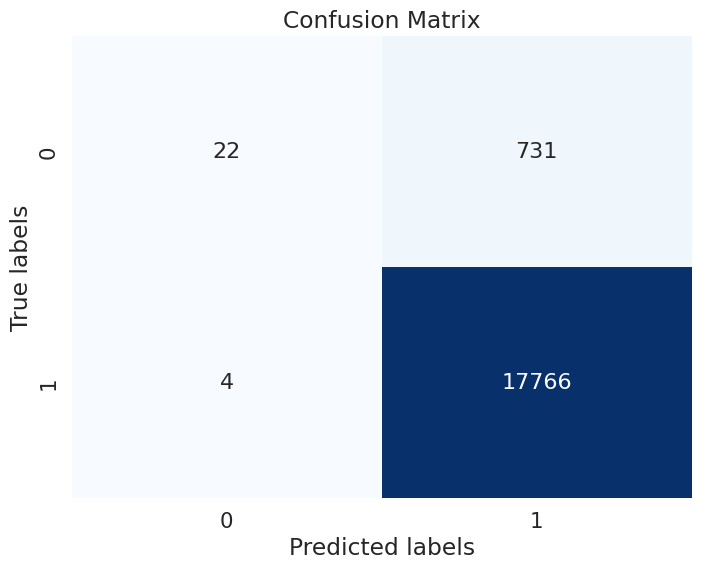

Confusion Matrix:
 [[   22   731]
 [    4 17766]]
Sensitivity (Recall or True Positive Rate): 1.00
Specificity (True Negative Rate): 0.03

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.03      0.06       753
        True       0.96      1.00      0.98     17770

    accuracy                           0.96     18523
   macro avg       0.90      0.51      0.52     18523
weighted avg       0.96      0.96      0.94     18523



In [5]:
from sklearn.metrics import confusion_matrix, classification_report

# Assume X_test and y_test are your features and labels for the test set
# And 'model' is your trained logistic regression model
y_pred = model_l2.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate Sensitivity and Specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

cm = confusion_matrix(y_test, y_pred)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)  # fmt='g' to avoid scientific notation

# Adding labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

print("Confusion Matrix:\n", cm)
print("Sensitivity (Recall or True Positive Rate): {:.2f}".format(sensitivity))
print("Specificity (True Negative Rate): {:.2f}".format(specificity))

# Additionally, print a full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
print("Coefficients (L1):", model_l1.coef_)
print("Intercept (L1):", model_l1.intercept_)


Coefficients (L1): [[-2.43897509e-01 -1.53734128e-01  9.46413855e-02 -4.79603460e-02
  -7.04181121e-03 -3.47101604e-02  7.67954650e-02  2.58053755e-01
  -1.69139622e-02  3.48212374e-03 -1.40384652e-02  1.74091916e-02
   8.31011380e-03 -2.45080633e-02  0.00000000e+00 -5.14298457e-02
  -4.86862936e-02  2.66459424e-03 -1.92856685e-03  2.63630300e-02
  -1.36717833e-02  0.00000000e+00  1.26141471e-02  1.32472888e-02
   0.00000000e+00  4.50929434e-02  7.97502215e-02 -1.99602330e-02
   0.00000000e+00 -4.98921671e-03 -1.31831237e-01  8.97065733e-02
   1.89367259e-03 -4.06682227e-02  0.00000000e+00  3.04569714e-02
  -2.00955795e-02  7.61098478e-04 -4.01320466e-02 -4.18116313e-02
   4.01684806e-02  4.63077015e-02  1.24086009e-03 -2.40359826e-02
  -3.42226642e-02  2.49646210e-04 -1.90925404e-02  6.37203137e-02
  -4.11000098e-02  2.51043047e-02  9.39409774e-03 -2.48127739e-01
   0.00000000e+00  9.53790666e-02  8.66648936e-02 -1.12813980e-01
   6.52807108e-02  0.00000000e+00 -4.87577808e-03 -1.8363

In [ ]:
print("Coefficients (L1):", model_l2.coef_)
print("Intercept (L1):", model_l2.intercept_)


Coefficients (L1): [[-0.24409143 -0.1540378   0.095052   -0.0478693  -0.00791794 -0.03687026
   0.07688769  0.2581561  -0.01237782  0.00962056 -0.00878263  0.02399714
   0.01372437 -0.02172042  0.00289363 -0.04973567 -0.04620386  0.00596509
   0.00066571  0.02960532 -0.01182861  0.00097641  0.01404765  0.01482815
  -0.01350146  0.03971939  0.0766818  -0.03190708  0.00118082 -0.00511024
  -0.13116536  0.09089489  0.00245223 -0.04039371 -0.00072344  0.03084533
  -0.02038819  0.00117077 -0.04036721 -0.04193191  0.04067989  0.04680254
   0.00168675 -0.02428475 -0.0343457   0.00067637 -0.01930403  0.06444557
  -0.04122936  0.0256114   0.0211915  -0.18566377  0.06180044  0.13643998
   0.11060142 -0.08898258  0.08929534  0.0133715   0.00298853 -0.08783711
   0.03004386 -0.03524009 -0.01489964  0.05911002 -0.08783711  0.05072578
  -0.01804617 -0.06162367 -0.01746858 -0.08783711  0.17634843 -0.11340466
  -0.15219841 -0.03857387 -0.08783711 -0.03664577  0.06132085 -0.03558579
  -0.01679708 -0.08

In [ ]:
import statsmodels.api as sm

# Create a logistic regression model with L1 (Lasso) regularization
model_l1 = sm.Logit(y_train, sm.add_constant(X_train)).fit_regularized(method='l1', alpha=0.5)

# Create a logistic regression model with L2 (Ridge) regularization
model_l2 = sm.Logit(y_train, sm.add_constant(X_train)).fit_regularized(method='l2', alpha=0.1)

# Print summary statistics
print("L1 Regularization:")
print(model_l1.summary())

print("\nL2 Regularization:")
print(model_l2.summary())


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.14787934021950067
            Iterations: 492
            Function evaluations: 493
            Gradient evaluations: 492


/usr/local/lib/python3.10/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 37 out of 96 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


ValueError: `method` = l2 is not supported, use either "l1" or "l1_cvxopt_cp"

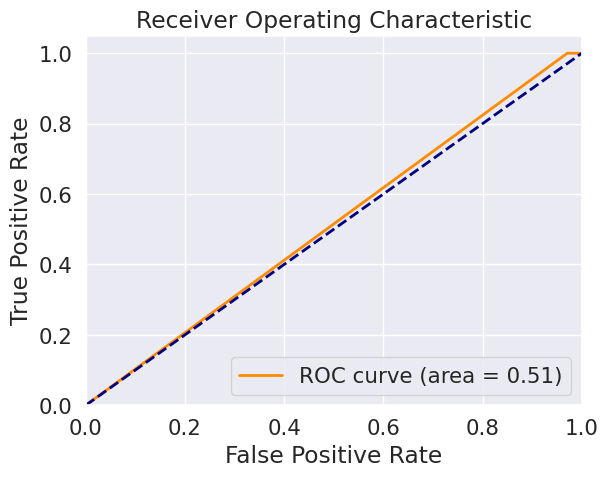

In [ ]:

# Assuming binary classification
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
